# LSL Latency Measurement Using RTT

Samples from this device were sent over the network and timestamped using this device's local clock. the timestamp (and samples) were recieved by another device. the timestamps were then re-sent to this device and compared with the device's local clock to deduce the Round Trip Time (RTT). This notebook is the third stage where the timestamp is returned to the original sending device and compared.

###### Note: 
You don't need to change anything in this script and can just click "Run All" -assuming the previous script is running- unless the stream type was changed in the previous script. In this case simply change the stream type in the resolve_stream() function

In [1]:
from pylsl import StreamInlet, resolve_stream, local_clock
import numpy as np
import matplotlib.pyplot as plt

In tis step, we are searching for the stream which carries the timestamps, and creating a NumPy array to hold the measured latency values for later analysis

In [2]:
print("looking for a Latency Analsis stream...")
streams = resolve_stream('type', 'Latency Analysis')
inlet = StreamInlet(streams[0])

latency = np.array([])

looking for a Latency Analsis stream...


Then, returned timestamps are subtracted from the local_clock() reading. This represents the RTT tmie. RTT is then devided by 2 to represent the latency -approximately, assuming symetric nnetwrok latency. 10 seconds-worth of latency values are stored for later analysis 

In [3]:
now = local_clock()
while local_clock() < now+10:
    sample, _ = inlet.pull_sample()
    latency_val = (local_clock() - sample[0])/2
    latency = np.append(latency, latency_val)
    print(latency_val)
    
del inlet, streams

0.001601299998583272
-0.001141499997174833
-0.00013364999904297292
0.0018141999971703626
-7.034999725874513e-05
0.0008747000028961338
-0.0008376999976462685
0.0010959999999613501
0.002092449998599477
0.0001038999980664812
-0.0014187499982654117
-0.0007416000007651746
0.0013284500018926337
-0.0006327500013867393
0.0004604499990819022
-0.001457749996916391
0.0006201500000315718
0.0014859000002616085
-0.00038920000224607065
0.0005299499971442856
-0.001222749997396022
0.0007090500002959743
0.0024470499993185513
-0.00017559999832883477
0.0022108999983174726
-0.0010786499988171272
0.0010264000011375174
-0.0009706499986350536
5.970000347588211e-05
0.002016149999690242
0.00028664999990724027
0.0010869000034290366
-0.0007110000005923212
0.0011626499981503002
-0.0016945500028668903
0.0007226500019896775
-0.0013797499996144325
-0.0004719499993370846
0.0015115499991225079
0.0031238000010489486
0.003470049996394664
-2.5250003091059625e-05
0.0006892000019433908
0.0021991500034346245
-0.0001807000007

-0.0002332500007469207
0.0009715999985928647
-0.0008150499998009764
0.0008879000015440397
0.0017542999994475394
-1.3149998267181218e-05
0.002055999997537583
-0.0009211500000674278
0.0009798500032047741
-0.0008019500019145198
0.0001244000013684854
-0.0012357000014162622
0.00024405000294791535
0.0012801999982912093
-0.0006655499964836054
0.0021650999988196418
-0.000996100003249012
0.0005437500003608875
-0.0015367500018328428
-0.000428999999712687
0.0014698500017402694
-0.00029570000333478674
0.0005630500018014573
-0.0011555000019143336
0.0007973000028869137
0.0017768999969121069
-0.0001231499991263263
0.0019096499963779934
-0.0010597000000416301
0.0009875999967334792
-0.0009668499988038093
8.57499981066212e-05
0.0020913999978802167
0.00021389999892562628
0.0011060000033467077
-0.0006174000009195879
0.001396350002323743
-0.0015321000028052367
0.00041244999738410115
-0.0011882999970111996
-0.0005183999965083785
0.0015945499981171452
-0.00038094999763416126
0.0007181499968282878
0.003050550

-0.0004202499985694885
0.0017070500034606084
-0.00019330000213813037
0.0006948500013095327
-0.0012750500027323142
0.000800499998149462
0.001692650002951268
2.340000355616212e-05
0.0018274999965797178
-0.0009695499975350685
0.0010135499978787266
-0.0005900000032852404
0.0001584999990882352
0.002124400001775939
0.00023815000167815015
0.00132714999926975
-0.0005387999990489334
0.0013756999978795648
-0.0016479499972774647
0.00045215000136522576
0.0013607500004582107
-0.0004892500001005828
0.0016504000013810582
-0.0012894500032416545
0.00068710000050487
-0.0012563499985844828
-0.00029429999995045364
0.0018151499971281737
-0.00010659999679774046
0.0009685999975772575
-0.0010771500019473024
0.0010306499971193261
0.0021064500033389777
0.0001727499984554015
0.0020409999997355044
-0.0008313500002259389
0.0011615499970503151
-0.0006022000015946105
0.0001992999968933873
-0.001574800000526011
0.003028350001841318
0.0034402500023134053
0.00027764999686041847
0.0015454500025953166
-0.0014408499991986

0.0006991999980527908
0.0016473499999847263
7.090000144671649e-05
0.0016850000029080547
-0.0013329499997780658
0.0007342000026255846
-0.0012340999965090305
-4.194999928586185e-05
0.0017198999994434416
-0.00012194999726489186
0.0008672999974805862
-0.0009185000017168932
0.001152550001279451
0.002006549999350682
3.309999738121405e-05
0.0021790500031784177
-0.0008066500013228506
0.0013576999990618788
-0.0006719500015606172
0.00036854999780189246
-0.0015876000034040771
0.0004996999996365048
0.0017275999998673797
-0.0003049500010092743
0.0016192499970202334
-0.00134529999922961
0.00065080000058515
-0.0010938999985228293
-0.0002613000033306889
0.0018022500007646158
-0.000149200001033023
0.0008743500002310611
-0.0009047499988810159
0.001041099996655248
0.0019151000014971942
0.00015159999747993425
0.0021151999972062185
-0.0007560000012745149
0.0011366499966243282
0.0015533499972661957
0.0019028500028070994
-0.0016018000023905188
0.0005477500017150305
0.001406199997290969
-0.0005101999995531514

-0.00030035000236239284
0.000534849998075515
-0.0013610500027425587
0.0005994500024826266
0.0017137500035460107
0.001989650001632981
0.0038443000012193806
0.00014224999904399738
0.0018034500026260503
-0.0009618499971111305
0.00018219999765278772
0.002004599999054335
0.00046550000115530565
0.0010066999966511503
-0.0008050000033108518
0.0010339500004192814
0.0020233000032021664
0.00011334999726386741
0.0012848499973188154
-0.0006714499977533706
0.0013431499974103644
-0.0016224499995587394
0.00043495000136317685
-0.0014523999998345971
-0.0002825999981723726
0.0017535000006319024
-0.00036854999780189246
0.0006064499975764193
-0.0011033999981009401
0.0007949999999254942
0.0017446999991079792
-0.0001523000028100796
0.0018869499981519766
-0.0008845499978633597
0.0010389500021119602
-0.0010099999999511056
7.660000119358301e-05
-0.0016182000035769306
0.0003049500010092743
0.002236699998320546
-0.000723099998140242
0.0012067499992554076
-0.001710049997200258
0.007048150000628084
0.00374510000256

-0.000374549999833107
0.00131379999947967
-0.0015427999969688244
0.0005291499983286485
-0.001388800003041979
-0.00037739999970654026
0.0016395999991800636
-0.00033054999948944896
0.0017237499996554106
-0.0012355500002740882
0.0007344499972532503
0.001656200001889374
-0.00010689999908208847
0.0019894500001100823
-0.0010163999977521598
0.0009228499984601513
-0.000902150000911206
3.229999856557697e-05
0.0021723500030930154
0.0002386999985901639
0.0012597000022651628
-0.0007069999992381781
0.0013402999975369312
-0.0015481000009458512
0.0004724000027636066
-0.001494800002546981
-0.000378249998902902
0.0014998999977251515
-0.0003117500018561259
0.0006779000032111071
-0.0012433500014594756
0.0007508999988203868
0.0017624500032979995
-7.314999675145373e-05
0.0019001999971806072
-0.0010346999988541938
0.0010279999987687916
-0.000705099999322556
0.0008592500016675331
0.0022542500009876676
0.0002613000033306889
0.001170399998954963
0.0016179500016733073
0.0019708499967237003
-0.001545899998745881

0.000410849999752827
0.0015000499988673255
-0.0006006999974488281
0.0013843999986420386
-0.0014907500008121133
0.00063265000062529
-0.001396549996570684
-0.0005023499979870394
0.0016662999987602234
-0.0003401499998290092
0.0006736499999533407
-0.001324249999015592
0.0008388499991269782
0.0019423999983700924
-1.835000148275867e-05
0.0010009999969042838
-0.000986150000244379
0.0009911500019370578
0.002063849999103695
0.00010274999658577144
0.0022143000023788773
-0.0007670999984839
0.001280249998671934
-0.0005661000031977892
0.00033445000008214265
-0.001440350002667401
0.0005871999965165742
0.0014430500013986602
-0.0003143499998259358
0.001520199999504257
-0.0013688999970327131
0.0005885999999009073
-0.0012061000015819445
-0.00017004999972414225
0.0018008499973802827
-0.0001223500003106892
0.0008831000013742596
-0.0010734000024967827
0.0012725999986287206
0.0020403500020620413
0.0028363500023260713
0.0031340999994426966
-0.000414249996538274
0.001338050002232194
-0.0005127499971422367
0.0

0.002060999999230262
0.00026359999901615083
-0.0015679499992984347
-0.00046019999717827886
0.001668149998295121
-0.00042935000237775967
0.0004065000030095689
-0.001432500001101289
0.00045744999806629494
0.0015723000033176504
-0.00042070000199601054
0.0016298499976983294
-0.0014074999999138527
0.000698049996572081
-0.0011079000032623298
-0.0001397500018356368
0.00214869999763323
-3.489999653538689e-05
0.000959849996434059
-0.0007473000005120412
0.0010922000001301058
0.002064200001768768
0.00013095000031171367
0.0021594999998342246
-0.0006500500021502376
0.00131975000113016
-0.0007361500029219314
0.00041429999691899866
-0.001477600002544932
0.0005361000003176741
0.0014023999974597245
-0.00038720000156899914
0.0015543999979854561
-0.0013325999971129932
0.0007770500014885329
-0.0011600500001804903
-0.0002596499980427325
0.0018064499963657
-0.00015130000247154385
0.001160250001703389
-0.0009486499984632246
0.0010771000015665777
0.0019672999987960793
9.344999853055924e-05
0.00267894999706186

### Analyzing the latency values

Latency Average Value is:	 1.046143560244198  ms
Latency Maximum Value is:	 7.027200001175515 ms
Latency Minimum Value is:	 -1.8042000010609627 ms


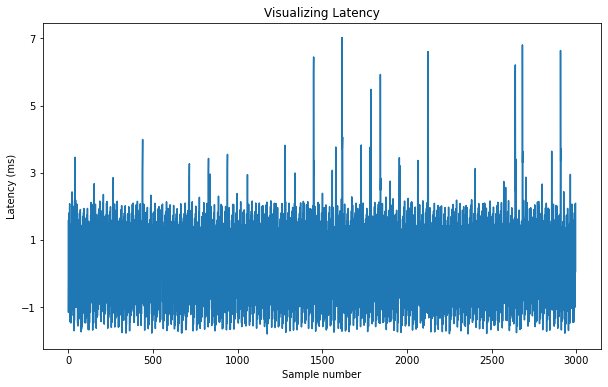

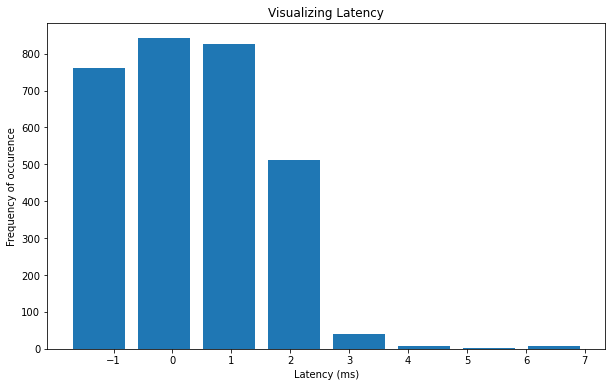

In [12]:
print('Latency Average Value is:\t', np.average(np.abs(latency))*1000, ' ms')
print('Latency Maximum Value is:\t', np.max(latency)*1000, 'ms')
print('Latency Minimum Value is:\t', np.min(latency)*1000, 'ms')

plt.rcParams['figure.figsize']=[10,6]
plt.plot(latency*1000)
plt.xlabel('Sample number')
plt.ylabel('Latency (ms)')
plt.title('Visualizing Latency')
plt.yticks(range(int(min(latency)*1000), int(max(latency)*1000)+1, 2))
plt.show()

plt.hist(latency*1000, 8, rwidth = 0.8)
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency of occurence')
plt.title('Visualizing Latency')
plt.xticks(range(int(min(latency)*1000), int(max(latency)*1000)+1))
plt.show()